In [1]:
import matplotlib.pyplot as plt
import pickle as pickle
import numpy as np
%matplotlib inline

In [2]:
with open("l1m.pkl", "rb") as fp:
    l1m = pickle.load(fp)
with open("l2m.pkl", "rb") as fp:
    l2m = pickle.load(fp)
with open("traces.pkl", "rb") as fp:
    traces = pickle.load(fp)



In [12]:
diff = np.array(l2m) - np.array(l1m)
type(diff)

numpy.ndarray

In [84]:
diff_less_100 = diff[diff <= 100]
diff_100s = diff_less_100[diff_less_100 >= -100]

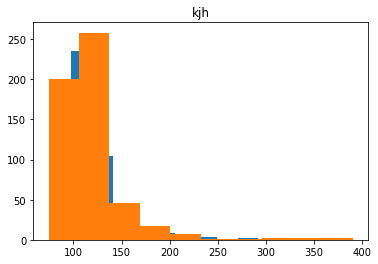

In [4]:
plt.hist(l1m)
plt.title('kjh')
plt.hist(l2m)
plt.show()

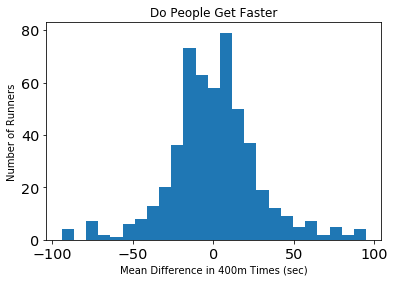

In [131]:
plt.hist(diff_100s,bins=25)
plt.title('Do People Get Faster')
plt.xlabel('Mean Difference in 400m Times (sec)')
plt.xticks()
plt.ylabel('Number of Runners')
plt.savefig('mean_difference.png')
plt.show()

In [6]:
diff_faster = diff <= 0


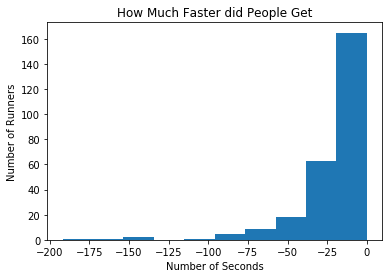

In [42]:
plt.hist(diff[diff_faster])
plt.title("How Much Faster did People Get")
plt.xlabel('Number of Seconds')
plt.ylabel('Number of Runners')
plt.savefig('how_much_faster.png')
plt.show()

In [30]:
with open("good_runners.pkl", "rb") as fp:
    runners = pickle.load(fp)
with open("a2.pkl", "rb") as fp:
    efforts = pickle.load(fp)
with open("sm.pkl", "rb") as fp:
    switchpoint = pickle.load(fp)
switchpoint = np.array(switchpoint)

In [9]:
how_many = []
for runner in runners:
    how_many.append(efforts[1][runner])

In [45]:
how_many[:10]
how_many = np.array(how_many)


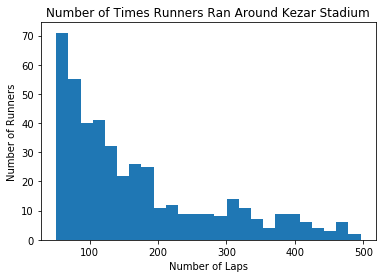

In [48]:
plt.hist(how_many[how_many <= 500],bins=25)
plt.title("Number of Times Runners Ran Around Kezar Stadium")
plt.xlabel('Number of Laps')
plt.ylabel('Number of Runners')
plt.savefig('number_of_laps.png')
plt.show()

In [119]:
# Profile for runners with 50-99 laps
sessions = []
for i,runner in enumerate(runners):
    sessions.append(efforts[1][runner])
sessions = np.array(sessions)
less_than_100_index = sessions <= 100
less_than_200_index = (sessions <= 200) & (sessions > 100)



In [120]:
diff_100 = diff[less_than_100_index]
diff_200 = diff[less_than_200_index]


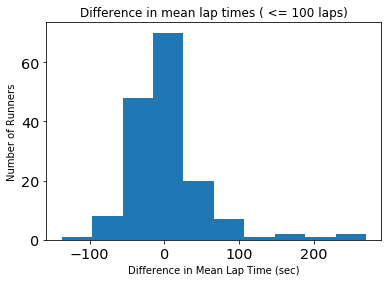

In [121]:
plt.hist(diff_100)
plt.title('Difference in mean lap times ( <= 100 laps)')
plt.xlabel('Difference in Mean Lap Time (sec)')
plt.ylabel('Number of Runners')
plt.savefig('difference_100.png')
plt.show()

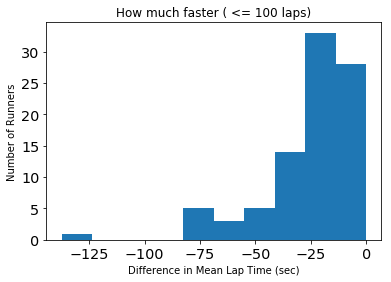

In [122]:
plt.hist(diff_100[diff_100 <= 0])
plt.title('How much faster ( <= 100 laps)')
plt.xlabel('Difference in Mean Lap Time (sec)')
plt.ylabel('Number of Runners')
plt.savefig('how_much_100.png')
plt.show()

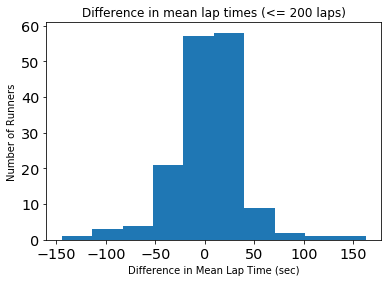

In [123]:
plt.hist(diff_200)
plt.title('Difference in mean lap times (<= 200 laps)')
plt.xlabel('Difference in Mean Lap Time (sec)')
plt.ylabel('Number of Runners')
plt.savefig('difference_200.png')
plt.show()

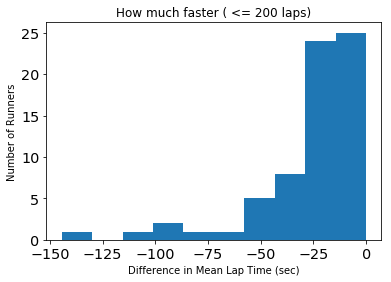

In [124]:
plt.hist(diff_200[diff_200 <= 0])
plt.title('How much faster ( <= 200 laps)')
plt.xlabel('Difference in Mean Lap Time (sec)')
plt.ylabel('Number of Runners')
plt.savefig('how_much_200.png')
plt.show()

In [32]:
len(switchpoint)

536

In [125]:
switchpoint_100 = switchpoint[less_than_100_index]
switchpoint_200 = switchpoint[less_than_200_index]

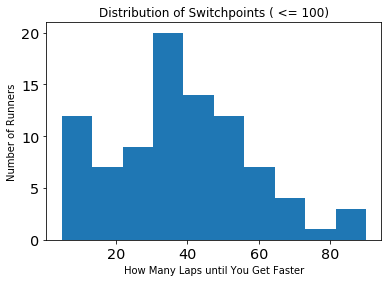

In [126]:
plt.hist(switchpoint_100[diff_100 <= 0])
plt.title('Distribution of Switchpoints ( <= 100)')
plt.xlabel('How Many Laps until You Get Faster')
plt.ylabel('Number of Runners')
plt.savefig('switchpoint_100.png')
plt.show()

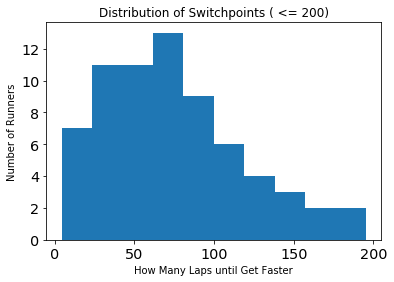

In [127]:
plt.hist(switchpoint_200[diff_200 <= 0])
plt.title('Distribution of Switchpoints ( <= 200)')
plt.xlabel('How Many Laps until Get Faster')
plt.ylabel('Number of Runners')
plt.savefig('switchpoint_200.png')
plt.show()

In [68]:
params = {'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

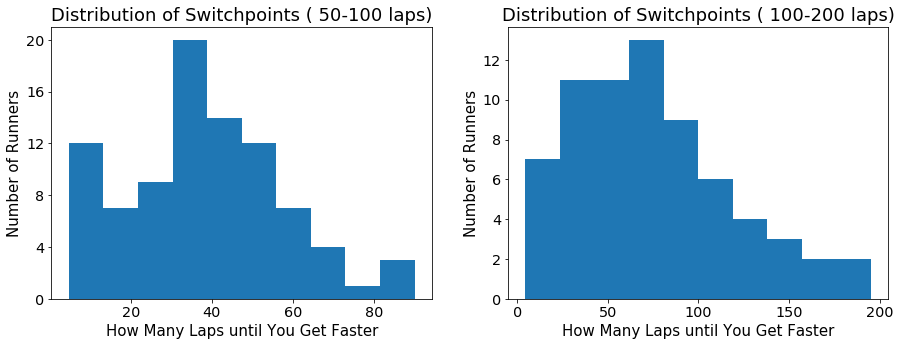

In [138]:

plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.hist(switchpoint_100[diff_100 <= 0])
plt.title('Distribution of Switchpoints ( 50-100 laps)',fontsize=18)
plt.xlabel('How Many Laps until You Get Faster',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.yticks(np.arange(0,21,4))
plt.subplot(122)
plt.hist(switchpoint_200[diff_200 <= 0])
plt.title('Distribution of Switchpoints ( 100-200 laps)',fontsize=18)
plt.xlabel('How Many Laps until You Get Faster',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.savefig('switchpoints.png')
plt.show()

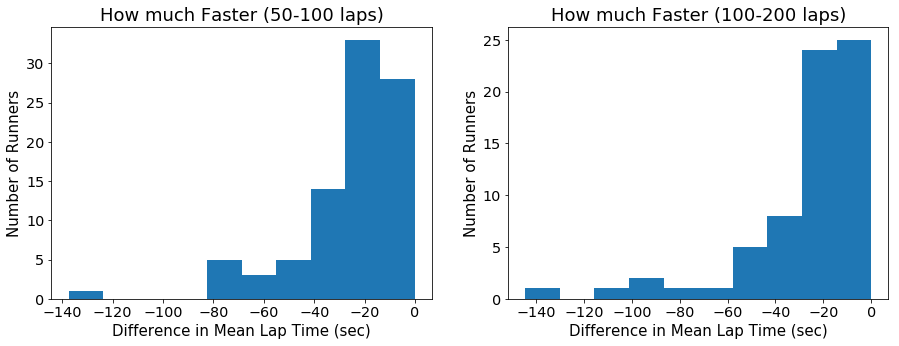

In [173]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.hist(diff_100[diff_100 <= 0])
plt.title('How much Faster (50-100 laps)',fontsize=18)
plt.xlabel('Difference in Mean Lap Time (sec)',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.subplot(122)
plt.hist(diff_200[diff_200 <= 0])
plt.title('How much Faster (100-200 laps)',fontsize=18)
plt.xlabel('Difference in Mean Lap Time (sec)',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.savefig('howmuchfaster.png')
plt.show()

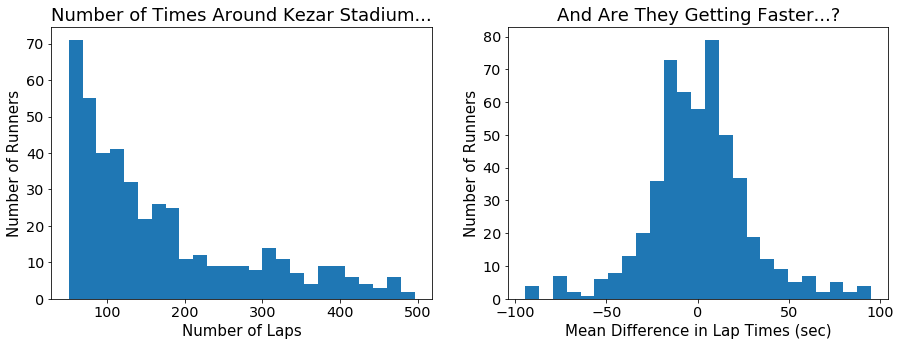

In [132]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.hist(how_many[how_many <= 500],bins=25)
plt.title("Number of Times Around Kezar Stadium...",fontsize=18)
plt.xlabel('Number of Laps',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.subplot(122)
plt.hist(diff_100s,bins=25)
plt.title('And Are They Getting Faster...?',fontsize=18)
plt.xlabel('Mean Difference in Lap Times (sec)',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.savefig('intro_plot.png')
plt.show()

In [141]:
l1m = np.array(l1m)
l2m = np.array(l2m)

In [170]:
faster_switchpoint = switchpoint[(sessions <= 200) & (l1m <= 95) & (diff <= 100) & (diff > -100)]
slower_switchpoint = switchpoint[(sessions <= 200) & (l1m > 95) & (diff <= 100) & (diff > -100)]

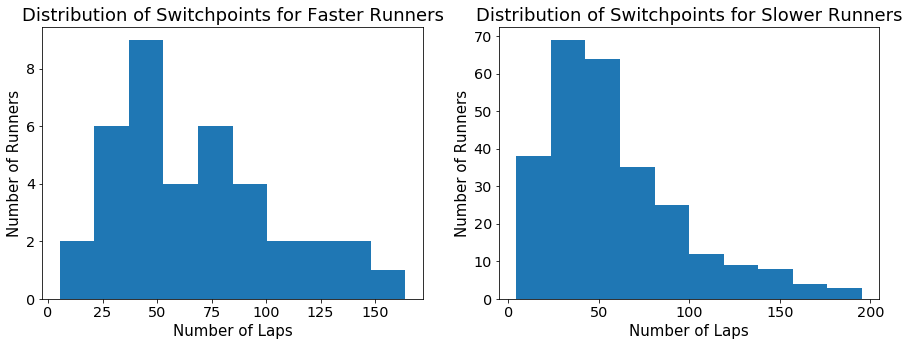

In [172]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.hist(faster_switchpoint)
plt.title('Distribution of Switchpoints for Faster Runners',fontsize=18)
plt.xlabel('Number of Laps',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.subplot(122)
plt.hist(slower_switchpoint)
plt.title('Distribution of Switchpoints for Slower Runners',fontsize=18)
plt.xlabel('Number of Laps',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.savefig('fastslowswitchpoint.png')
plt.show()

In [191]:
diff_faster = diff[(sessions <= 200) & (l1m <= 95)]
diff_slower = diff[(sessions <= 200) & (l1m > 95)]

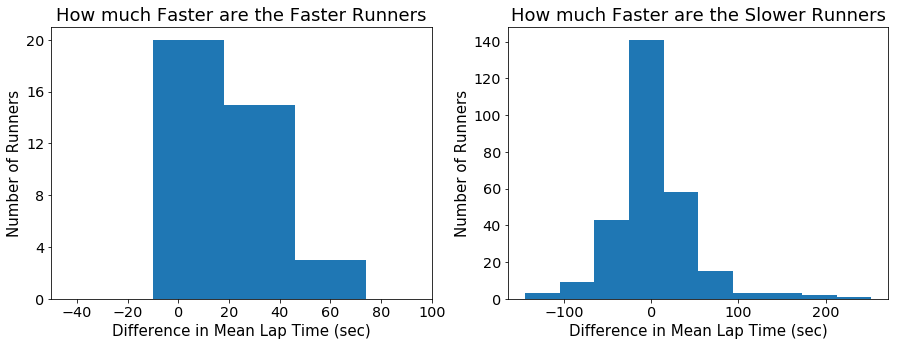

In [192]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.hist(diff_faster)
plt.title('How much Faster are the Faster Runners',fontsize=18)
plt.xlabel('Difference in Mean Lap Time (sec)',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.yticks(np.arange(0,21,4))
plt.xlim((-50,100))
plt.subplot(122)
plt.hist(diff_slower)
plt.title('How much Faster are the Slower Runners',fontsize=18)
plt.xlabel('Difference in Mean Lap Time (sec)',fontsize=15)
plt.ylabel('Number of Runners',fontsize=15)
plt.savefig('howmuchfaster2.png')
plt.show()